# **A Hands-On RFM Analysis: Customer Segmentation**


## Introduction

#### 🧑‍🏫 Author: [Nhi Yen](https://www.linkedin.com/in/yennhi95zz/)
#### 💡I write about Machine Learning on [Medium](https://medium.com/@yennhi95zz) || [Github](https://github.com/yennhi95zz) || [Kaggle](https://www.kaggle.com/nhiyen/code) || [Linkedin](https://www.linkedin.com/in/yennhi95zz/). If you found this article interesting, your support by giving me ⭐ will help me spread the knowledge to others.


# 0. About the Dataset
[The Online Retail II](https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci) dataset is about two years of real online retail transactions in the UK. It includes information about products, quantities, prices, customer IDs, and countries. The company sells unique gifts, and many customers are wholesalers. The data can help understand customer behavior and predict profitability over time. It has been used in research studies for customer segmentation and prediction.

# 1. Download and Load the Dataset:

To begin, we need data. We've obtained an online retail dataset from Kaggle. The first step is downloading and loading the data into a Pandas DataFrame.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/online-retail-ii-uci/online_retail_II.csv')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# 2. Data Preprocessing:

Before diving into the analysis, we must ensure our data is clean and well-structured. This involves handling missing values and converting data types if needed.

- Handle missing values, if any.
- Convert data types if necessary.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print('No. of missing values: {}. \n'.format(missing_values))

# Handle missing values (example: removing rows with missing values)
data = data.dropna()

# Convert InvoiceDate to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data.head()

No. of missing values: Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64. 



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# 3. RFM Calculation

RFM stands for Recency, Frequency, and Monetary value. These metrics help us understand customer behavior. We'll calculate these metrics for each customer.

READ MORE: [RFM Scores Calculation](https://medium.com/@yennhi95zz/using-rfm-analysis-for-effective-customer-segmentation-in-marketing-4964a99bf606)

In [4]:
from datetime import datetime

# Calculate recency, frequency, and monetary values
today = datetime(2023, 8, 6)  # Update with the current date
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
rfm_data = data.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (today - x.max()).days,
    'Invoice': 'nunique',
    'Price': 'sum'
}).reset_index()

# Rename columns
rfm_data.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']
rfm_data.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,4582,17,580.44
1,12347.0,4259,8,644.16
2,12348.0,4332,5,193.10
3,12349.0,4275,5,1504.59
4,12350.0,4567,1,65.30


# 4. Feature Scaling:
Scale the RFM features to have similar scales.

The code utilizes **StandardScaler** to normalize the RFM (Recency, Frequency, Monetary) metrics, ensuring uniform scale for accurate analysis. Key points include:
StandardScaler is applied to `'Recency,' 'Frequency,' and 'Monetary'` columns individually.
Scaled values are organized into `rfm_scaled_df` DataFrame.

Feature scaling enhances data consistency and aids in unbiased analysis or modeling.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
rfm_scaled_df.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Recency,Frequency,Monetary
0,0.578405,0.591554,0.036716
1,-0.946162,0.028030,0.069977
2,-0.601600,-0.159812,-0.165470
3,-0.870642,-0.159812,0.519110
4,0.507605,-0.410267,-0.232180


# 5. K-Means Clustering
Determine the optimal number of clusters using techniques like the **Elbow Method** or **Silhouette Score**.

Perform K-Means clustering.

In [6]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

# # Re-enable warnings
# warnings.resetwarnings()

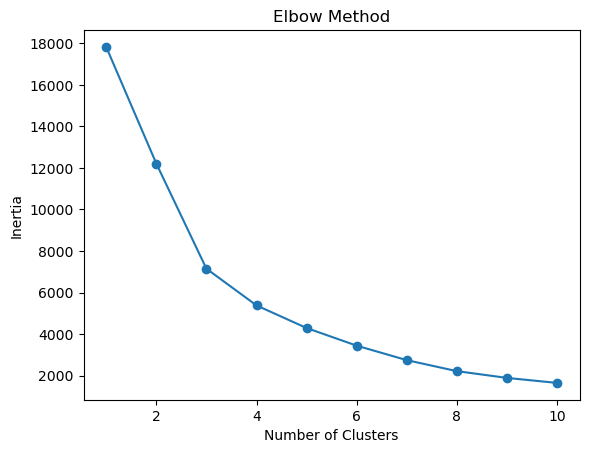

,Customer ID,Recency,Frequency,Monetary,Cluster
0,12346.0,4582,17,580.44,0
1,12347.0,4259,8,644.16,1
2,12348.0,4332,5,193.10,1
3,12349.0,4275,5,1504.59,1
4,12350.0,4567,1,65.30,0


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Find optimal number of clusters using the Elbow Method
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method
import matplotlib.pyplot as plt

plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters (e.g., from the elbow point or Silhouette Score)
n_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm_data.head()

# 6. Visualization
Visualize the clusters and their characteristics.

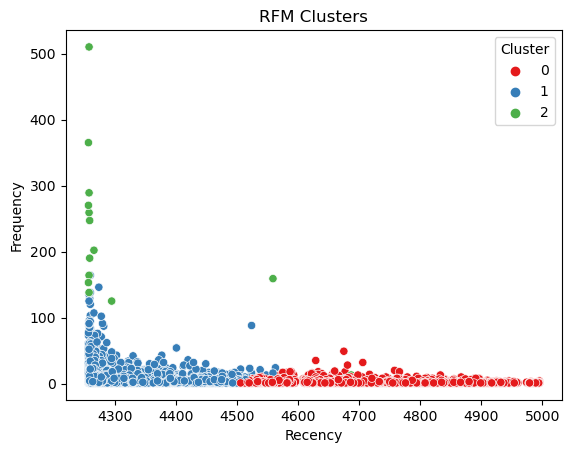

In [8]:
import seaborn as sns

# Visualize the clusters
sns.scatterplot(data=rfm_data, x='Recency', y='Frequency', hue='Cluster', palette='Set1')
plt.title('RFM Clusters')
plt.show()


The RFM clustering results show that there are three distinct clusters of customers:

- **Cluster 0**: These customers are the most recent and frequent buyers, and they also have the highest monetary value. They are the most valuable customers to the business, and they should be targeted with marketing campaigns that encourage them to continue spending.
- **Cluster 1**: These customers are less recent than Cluster 0, but they are still relatively frequent buyers. They have a lower monetary value than Cluster 0, but they are still valuable customers. They should be targeted with marketing campaigns that encourage them to increase their spending.
- **Cluster 2**: These customers are the least recent and frequent buyers, and they also have the lowest monetary value. They are the least valuable customers to the business, and they may be at risk of churning. They should be targeted with marketing campaigns that encourage them to become more active.

The following table summarizes the characteristics of the three clusters:

Cluster| Recency  | Frequency| Monetary | Value
-------| -------- | -------- | -------- | --------
0      | High     | High     | High     | High
1      | Medium   | Medium   | Medium   | Medium
2      | Low      | Low      | Low      | Low

‼! ***Remember to fine-tune the process, adjust parameters, and explore the results to get the best insights from your customer segmentation analysis. This is a basic outline to get you started; you can further customize and refine the analysis based on your specific requirements.***

## References
- Kaggle Dataset: [Online Retail II UCI](https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci)
- Github Repo - [HERE](https://github.com/yennhi95zz/rfm-analysis-discover-customer-segmentation-insights-with-python)
- Kaggle Project - [HERE](https://www.kaggle.com/nhiyen/credit-card-fraud-detection-a-hands-on-project)
- Detail Explanation about the code on [MEDIUM](https://medium.com/@yennhi95zz/a-hands-on-rfm-analysis-discover-customer-segmentation-insights-with-python-f70836d14c8)